Ejemplo basado de: https://www.kaggle.com/code/sujithmandala/satellite-image-classification-cnn#Satellite-Image-Classification

In [ ]:
!pip install kaggle


In [22]:
!pip install pydot

In [21]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 779.1 kB/s eta 0:00:00


In [25]:
import tensorflow as tf
import keras

In [2]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('satellite-image-classification')


In [3]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'satellite-image-classification/data/cloudy' : 'Cloudy',
          'satellite-image-classification/data/desert' : 'Desert',
          'satellite-image-classification/data/green_area' : 'Green_Area',
          'satellite-image-classification/data/water' : 'Water',
           }

In [4]:
print(data)

Empty DataFrame
Columns: [image_path, label]
Index: []


In [5]:
import pandas as pd
import os

# Crear un DataFrame vacío con las columnas 'image_path' y 'label'
data = pd.DataFrame(columns=['image_path', 'label'])

# Definir las etiquetas/clases
labels = {
    'satellite-image-classification/data/cloudy': 'Cloudy',
    'satellite-image-classification/data/desert': 'Desert',
    'satellite-image-classification/data/green_area': 'Green_Area',
    'satellite-image-classification/data/water': 'Water'
}

# Lista para almacenar los datos antes de convertir en DataFrame
data_list = []

# Iterar sobre las carpetas y extraer la ruta de la imagen y la etiqueta
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data_list.append({'image_path': image_path, 'label': label})

# Convertir la lista en un DataFrame de pandas
data = pd.DataFrame(data_list)

# Guardar el DataFrame en un archivo CSV
data.to_csv('image_dataset.csv', index=False)

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


                                          image_path   label
0  satellite-image-classification/data/cloudy/tra...  Cloudy
1  satellite-image-classification/data/cloudy/tra...  Cloudy
2  satellite-image-classification/data/cloudy/tra...  Cloudy
3  satellite-image-classification/data/cloudy/tra...  Cloudy
4  satellite-image-classification/data/cloudy/tra...  Cloudy


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
# Load the dataset
df = pd.read_csv("image_dataset.csv")

In [8]:
df

,image_path,label
0,satellite-image-classification/data/cloudy/tra...,Cloudy
1,satellite-image-classification/data/cloudy/tra...,Cloudy
2,satellite-image-classification/data/cloudy/tra...,Cloudy
3,satellite-image-classification/data/cloudy/tra...,Cloudy
4,satellite-image-classification/data/cloudy/tra...,Cloudy
...,...,...
5626,satellite-image-classification/data/water/SeaL...,Water
5627,satellite-image-classification/data/water/SeaL...,Water
5628,satellite-image-classification/data/water/SeaL...,Water
5629,satellite-image-classification/data/water/SeaL...,Water


In [9]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Se realizan configuraciones diferentes a las propuestas

In [10]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [11]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit_generator(train_generator, epochs=4, validation_data=test_generator)

<ipython-input-13-e3a0841e0440>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=4, validation_data=test_generator)


Epoch 1/4
141/141 [==============================] - 140s 986ms/step - loss: 1.4683 - accuracy: 0.6881 - val_loss: 0.4086 - val_accuracy: 0.8154
Epoch 2/4
141/141 [==============================] - 139s 985ms/step - loss: 0.4593 - accuracy: 0.8093 - val_loss: 0.3820 - val_accuracy: 0.7799
Epoch 3/4
141/141 [==============================] - 139s 983ms/step - loss: 0.4129 - accuracy: 0.8324 - val_loss: 0.3472 - val_accuracy: 0.8740
Epoch 4/4
141/141 [==============================] - 139s 979ms/step - loss: 0.4199 - accuracy: 0.8275 - val_loss: 0.2902 - val_accuracy: 0.8917


In [14]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7a8f5e603f40>>

In [15]:

num_samples = test_df.shape[0]
num_samples

1127

In [16]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 4s 113ms/step - loss: 0.2902 - accuracy: 0.8917


In [26]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: [Errno 2] No such file or directory: '/content/cnn_model.png'

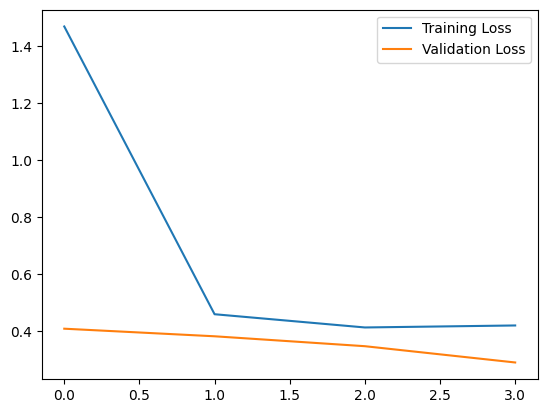

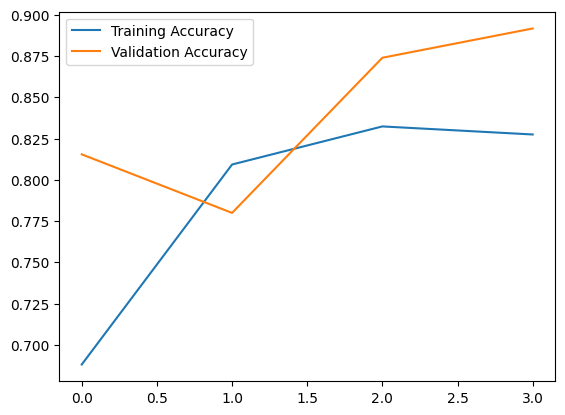

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [29]:
# Load an image from the test set
img = load_img("satellite-image-classification/data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [30]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [31]:
img_array.shape

(255, 255, 3)

In [32]:

# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [33]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [35]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 134ms/step


In [36]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [39]:
predictions = model.predict(test_generator)

36/36 [==============================] - 4s 107ms/step


In [40]:
actual_labels = test_generator.classes

In [41]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([2, 1, 2, ..., 3, 2, 0])

In [42]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [43]:
print(cm)

[[94 71 91 72]
 [67 55 68 37]
 [67 57 92 68]
 [74 74 72 68]]


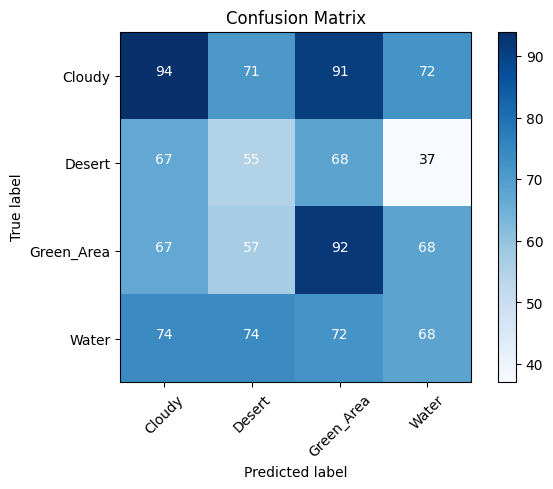

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()